# **PREDICCIÓN DEL PRECIO DE LAS CASAS EN AMSTERDAM**

### **ENTRENAMIENTO MODELOS ML**



In [ ]:
#Importación de métricas
from sklearn.model_selection import cross_val_score, GridSearchCV

#Importación de modelos de clasificación
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

#Creamos listas para almacenar los resultados obtenidos de los distintos modelos
  #modelos
models = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'Decision Tree','Random Forest', 'Gradient Boosting', 'SVR']

  #métricas
MAE_scores = []
MSE_scores = []
RMSE_scores = []
R2_scores = []

#Definición de los modelos
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
knn_model = KNeighborsRegressor()
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
svr_model = SVR()

#Lista de modelos
model_list = [linear_model, ridge_model, lasso_model, knn_model, tree_model, rf_model, gb_model, svr_model]


#####Entrenamiento de cada modelo

In [ ]:
#Entrenamiento y evaluacion de cada modelo
predictions = {}

for name, model in zip(models, model_list):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  predictions[name] = y_pred

  MAE_scores.append(mean_absolute_error(y_test, y_pred))
  MSE_scores.append(mean_squared_error(y_test, y_pred))
  RMSE_scores.append(root_mean_squared_error(y_test, y_pred))
  R2_scores.append(r2_score(y_test, y_pred))


#Creación de dataframe para los resultados
results_df_orig = pd.DataFrame({
    'Model': models,
    'MAE': MAE_scores,
    'MSE': MSE_scores,
    'RMSE': RMSE_scores,
    'R2': R2_scores,
})

#Mostrar resultados
print(results_df_orig)

               Model            MAE           MSE           RMSE        R2
0  Linear Regression  164755.885594  6.095823e+10  246897.195663  0.799811
1              Ridge  166323.142004  6.163593e+10  248265.841759  0.797585
2              Lasso  164760.955557  6.095984e+10  246900.456417  0.799805
3                KNN  156566.358696  7.429355e+10  272568.424905  0.756017
4      Decision Tree  156264.396739  1.712452e+11  413817.843951  0.437624
5      Random Forest  101266.745163  5.447068e+10  233389.538477  0.821116
6  Gradient Boosting  110242.212788  5.769627e+10  240200.481897  0.810523
7                SVR  290684.981505  3.290230e+11  573605.301886 -0.080525


Obtenemos como 3 mejores modelos: Random Forest, Gradient Boosting y Linear Regression

#####Entrenamiento con validación cruzada

In [ ]:
 #Entrenamiento y evaluacion de cada modelo con validación cruzada -> cross_validation
  #métricas
MAE_scores = []
MSE_scores = []
RMSE_scores = []
R2_scores = []

for model in model_list:
    MAE_scores.append(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=5).mean())
    MSE_scores.append(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv=5).mean())
    RMSE_scores.append(-cross_val_score(model, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv=5).mean())
    R2_scores.append(cross_val_score(model, X_train, y_train, scoring = 'r2', cv=5).mean())

#Creación de dataframe para los resultados
results_df_orig_cv = pd.DataFrame({
    'Model': models,
    'MAE': MAE_scores,
    'MSE': MSE_scores,
    'RMSE': RMSE_scores,
    'R2': R2_scores,
})

#Mostrar resultados
print(results_df_orig_cv)


               Model            MAE           MSE           RMSE        R2
0  Linear Regression  184535.357792  9.352117e+10  298135.331406  0.625094
1              Ridge  185886.073746  9.357192e+10  298404.322944  0.624490
2              Lasso  184538.408894  9.352121e+10  298135.891124  0.625094
3                KNN  166107.984848  1.057398e+11  308139.002421  0.623955
4      Decision Tree  157612.315922  1.489415e+11  369927.322023  0.353477
5      Random Forest  114398.634572  7.435760e+10  257181.101466  0.725791
6  Gradient Boosting  116087.938035  6.851210e+10  253471.616816  0.729920
7                SVR  273063.052901  3.094318e+11  535280.977825 -0.090693


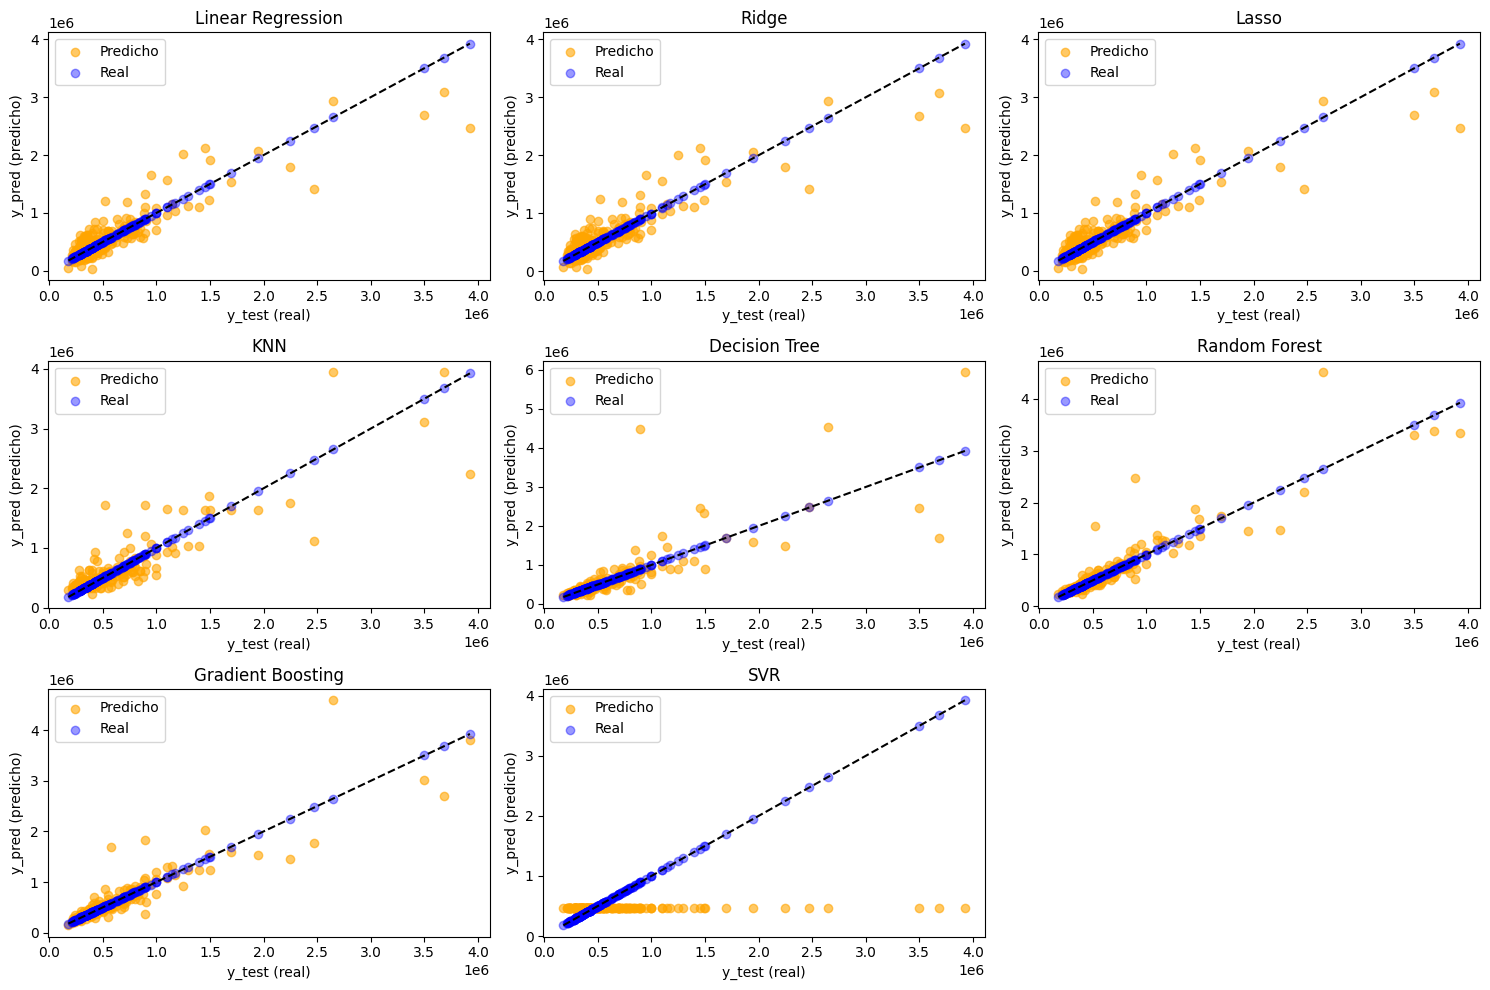

In [ ]:
# Suponiendo que y_test son tus datos reales y y_pred tus predicciones
plt.figure(figsize=(15, 10))

for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(3, 3, i)
    plt.scatter(y_test, y_pred, color='orange', alpha=0.6, label='Predicho')
    plt.scatter(y_test, y_test, color='blue', alpha=0.4, label='Real')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel("y_test (real)")
    plt.ylabel("y_pred (predicho)")
    plt.title(f"{name}")
    plt.legend()



plt.tight_layout()
plt.show()

### **AJUSTE HIPERPARÁMETROS Y OPTIMIZACIÓN DEL MODELO**



***Random Forest***

In [ ]:
#Ajuste hiperparámetros para Random Forest
param_grid_rf = {'n_estimators':[200, 250], 'max_depth': [35, 40], 'min_samples_split': [12, 15]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

In [ ]:
best_rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 40,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
import joblib
#Tras obtener los parámetros, probamos a volver a entrenar el modelo siguiento esto
rf_best = RandomForestRegressor(max_depth=35, n_estimators=200, min_samples_split=15)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

MAE=mean_absolute_error(y_test, y_pred)
MSE=mean_squared_error(y_test, y_pred)
RMSE=root_mean_squared_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)
print('mse',MSE)
print('mae',MAE)
print('r2',R2)

#Guardamos el modelo Random Forest
joblib.dump(rf_best, 'model/best_model_rf.pkl')


mse 37829375958.84858
mae 96675.39741164907
r2 0.875766762891636


['best_model_rf.pkl']

***Gradient Boosting***

In [ ]:
#Ajuste hiperparámetros para Gradient Boosting
param_grid_gb = {'n_estimators':[500, 800, 1000], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth':[2,3,4]}
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_

In [ ]:
best_gb_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Tras obtener los parámetros, probamos a volver a entrenar el modelo siguiento esto
gb_best = GradientBoostingRegressor(learning_rate=0.01, n_estimators=800, max_depth=3)
gb_best.fit(X_train, y_train)
y_pred = gb_best.predict(X_test)

MAE=mean_absolute_error(y_test, y_pred)
MSE=mean_squared_error(y_test, y_pred)
RMSE=root_mean_squared_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)
print('mse',MSE)
print('mae',MAE)
print('r2',R2)

mse 61986846983.75482
mae 114752.19299011228
r2 0.7964326277200613


***Linear Regression***